# Creating DCNN training libraries from label images

> Written by Dr Daniel Buscombe, Northern Arizona University

> Part of a series of notebooks for image recognition and classification using deep convolutional neural networks

This notebook is to demonstrate how to create libraries of categorized image tiles from ground truth (labelled) images, in order to retrain a DCNN using transfer learning

### Overview

The image is divided up into tiles of a specified size, "tilesize". 

If the proportion of pixels within the tile is greater than a specified amount, "threshold", then the tile is written to a file in a folder denoting its class. 

The tiles can then be 'thinned', by specifying what proportion of tiles (randomly selected from the entire catalogue) to keep - "prop_keep"

This generates both ground-truth label imagery (to evaluate classification performance) and sets of data suitable for training a DCNN.

![](figs/dl_tools_tile.png)

### Using a local directory

The images are from the California Coastal Records Project

Copyright (C) 2002–2018 Kenneth and Gabrielle Adelman, www.Californiacoastline.org and are used with permission. 

First, let's take a look at how many test/train images we have

In [1]:
from glob import glob
files = glob('ccr_train/*.JPG')
len(files)

15

30 training images. How many test images?

In [2]:
files = glob('ccr_test/*.JPG')
len(files)

10

we have 19 training images

Ok, let's create some 224x224 pixel tiles from the training images. We'll only keep tiles with 90% or more of pixels representing the dominant class, then we'll randomly select 10% of those tiles to train with (to speed things up)

In [3]:
direc='ccr_train'
tilesize = 224
threshold = 0.9
prop_keep=0.125

Retiling takes a few minutes, so let's watch a video on one convolutional net layer

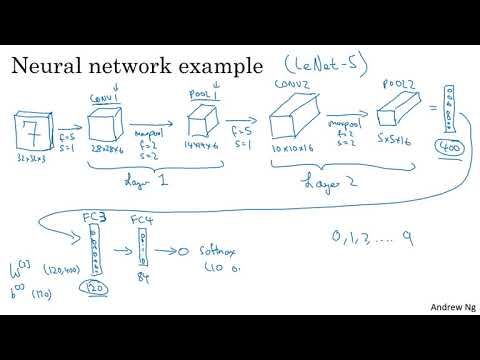

In [4]:
from IPython.display import YouTubeVideo
## CNN example
YouTubeVideo('bXJx7y51cl0') ##11 mins

In [5]:
## approx 6 mins

In [6]:
%run ./retile.py $direc $tilesize $threshold $prop_keep

ccr_train/201301034.JPG
ccr_train/201301127.JPG
ccr_train/201302501.JPG
ccr_train/201302765.JPG
ccr_train/201303464.JPG
ccr_train/201304247.JPG
ccr_train/201305224.JPG
ccr_train/201305596.JPG
ccr_train/201305721.JPG
ccr_train/201306308.JPG
ccr_train/201306933.JPG
ccr_train/201308459.JPG
ccr_train/201309043.JPG
ccr_train/201309922.JPG
ccr_train/201310440.JPG
thinning files ...
beach: 169
buildings: 206
cliff: 389
road: 743
sky: 642
surf: 1078
swash: 75
terrain: 235
veg: 52
water: 108


To do the same on the 'test' directory:

In [7]:
direc='ccr_test'
tilesize = 224
threshold = 0.9
prop_keep=0.125

In [8]:
## approx 4 mins

In [9]:
%run ./retile.py $direc $tilesize $threshold $prop_keep 

ccr_test/201302661.JPG
ccr_test/201303838.JPG
ccr_test/201305404.JPG
ccr_test/201305789.JPG
ccr_test/201306768.JPG
ccr_test/201308103.JPG
ccr_test/201308902.JPG
ccr_test/201309844.JPG
ccr_test/201310435.JPG
ccr_test/201310453.JPG
thinning files ...
beach: 106
buildings: 472
cliff: 298
road: 241
sky: 433
surf: 370
swash: 19
terrain: 197
veg: 12
water: 233


### From S3 bucket

This is an example of how to do the same as the above but this time using a dataset on the S3 bucket

In [10]:
import s3fs
fs = s3fs.S3FileSystem(anon=True)
S3direc='esipfed/cdi-workshop/semseg_data/ontario/train'
print(S3direc)

esipfed/cdi-workshop/semseg_data/ontario/train


How many files?

In [11]:
files = [f for f in fs.ls(S3direc) if f.endswith('.JPG')]
len(files)

24

In [12]:
tilesize = 224
threshold = 0.9
prop_keep=0.25

The s3 bucket is a read-only filesystem, which means we have to write out the tiles here to your local directory

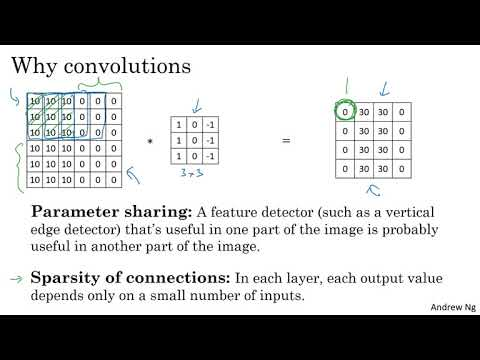

In [13]:
from IPython.display import YouTubeVideo
## Why convolutions?
YouTubeVideo('ay3zYUeuyhU') ##9 mins

In [14]:
%run ./retile_fromS3.py $S3direc $tilesize $threshold $prop_keep

esipfed/cdi-workshop/semseg_data/ontario/train
0
esipfed/cdi-workshop/semseg_data/ontario/train/A2013170_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013473_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013540_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013594_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013649_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013657_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013671_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013697_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013709_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013733_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013743_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013773_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013900_geotag.JPG
esipfed/cdi-workshop/semseg_data/ontario/train/A2013960_geotag.JPG
esipfed/cdi-w

Now we are ready to retrain the DCNN

## DL-tools

The equivalent function in DL-tools is called using:

```python create_library\retile.py -t 96 -a 0.9 -b 0.5```

where ```t``` is the tile size, ```a``` is the threshold proportion of pixels in a tile uniformly classified, and ```b``` is the proportion of the tiles to randomly select and keep

You will be prompted to select a set of .mat files. The tiles will be created in folders called "test" and "train". NOTE: Select mat files from the test folder to create tiles for results folder.